In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import re
import pandas as pd
from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches',['enable-logging'])
wd = webdriver.Chrome('./chromedriver.exe',options=options)

C:\Users\PC\AppData\Local\Temp\ipykernel_25292\4232793965.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe',options=options)


In [3]:
star_url = "https://www.starbucks.co.kr/store/store_map.do"
wd.get(star_url)

In [4]:
# selenium 4 버전으로 변경되면서 함수원형이 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [5]:
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [6]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [7]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [8]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [9]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [10]:
gu_list = list(set(df_star["구"]))
gu_list

['양천구',
 '마포구',
 '중랑구',
 '금천구',
 '서대문구',
 '노원구',
 '은평구',
 '서초구',
 '구로구',
 '동대문구',
 '성동구',
 '관악구',
 '강동구',
 '중구',
 '영등포구',
 '용산구',
 '송파구',
 '동작구',
 '광진구',
 '도봉구',
 '성북구',
 '강북구',
 '강남구',
 '강서구',
 '종로구']

In [11]:
edi_url = "https://www.ediya.com/contents/find_store.html"   # wd 로 다 고쳐준다
wd = webdriver.Chrome("./chromedriver.exe", options=options)
wd.get(edi_url)

C:\Users\PC\AppData\Local\Temp\ipykernel_25292\1577385957.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe", options=options)


In [12]:
edi_info = []



for gu in gu_list:
    wd.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH, '//*[@id="keyword"]').clear
    wd.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

688

In [15]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
683,화곡로점,강서구,서울 강서구 화곡로 133 (화곡동)
684,화곡본동시장점,강서구,서울 강서구 까치산로4길 11 (화곡동)
685,화곡사거리점,강서구,서울 강서구 곰달래로 135 (화곡동)
686,화곡중앙시장점,강서구,서울 강서구 가로공원로76길 61 (화곡동)
687,화곡중앙점,강서구,서울 강서구 까치산로 79 (화곡동)


In [16]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,양천구,17
1,마포구,35
2,중랑구,7
3,금천구,13
4,서대문구,21
5,노원구,13
6,은평구,10
7,서초구,48
8,구로구,12
9,동대문구,9


In [17]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,양천구,27
1,마포구,38
2,중랑구,27
3,금천구,23
4,서대문구,21
5,노원구,31
6,은평구,27
7,서초구,29
8,구로구,28
9,동대문구,25


In [18]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,양천구,27,17,10
1,마포구,38,35,3
2,중랑구,27,7,20
3,금천구,23,13,10
4,서대문구,21,21,0
5,노원구,31,13,18
6,은평구,27,10,17
7,서초구,29,48,-19
8,구로구,28,12,16
9,동대문구,25,9,16


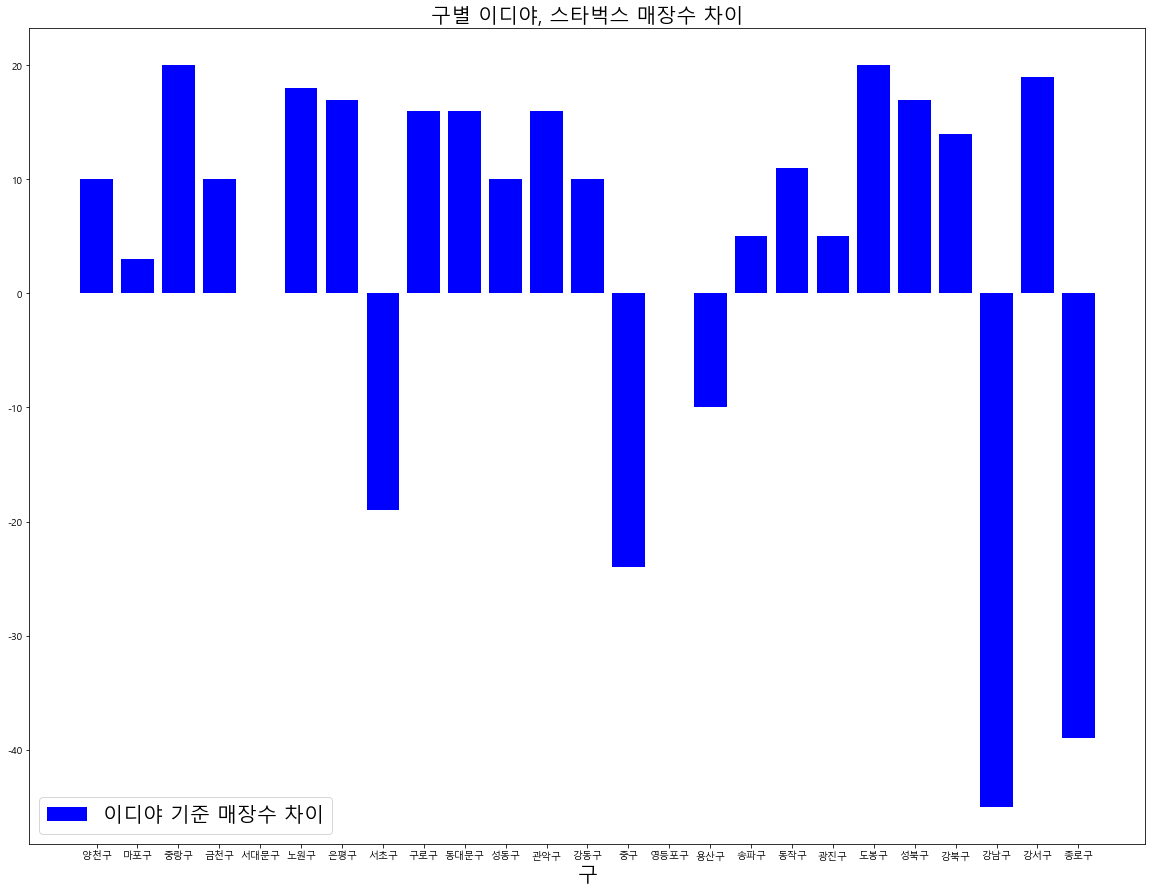

In [19]:
a = sum_data["매장 수 차이"]
y = "ediya"


plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()